# Test-retest analysis - 1 Year follow up sample

## Analysis overview

#### Discovery sample

1. Model fitting: [`Model fitting - Discovery.ipynb`](<../../notebooks/discovery/Model fitting - Discovery.ipynb>)
2. Confidence analysis: [`Confidence analysis - Discovery.ipynb`](<../../notebooks/discovery/Confidence analysis - Discovery.ipynb>)
3. Transdiagnostic factor estimation: [`Transdiagnostic factors - Discovery.ipynb`](<../../notebooks/discovery/Transdiagnostic factors - Discovery.ipynb>)
4. Symptom-behaviour analyses: [`Symptom analyses - Discovery.ipynb`](<../../notebooks/discovery/Symptom analyses - Discovery.ipynb>)

#### Replication sample

1. Model fitting: [`Model fitting - Replication.ipynb`](<../../notebooks/replication/Model fitting - Replication.ipynb>)
2. Confidence analysis: [`Confidence analysis - Replication.ipynb`](<../../notebooks/replication/Confidence analysis - Replication.ipynb>)
3. Two-step task analysis: [`Two-step modelling - Replication.ipynb`](<../../notebooks/replication/Two-step modelling - Replication.ipynb>)
4. Transdiagnostic factor estimation: [`Transdiagnostic factors - Replication.ipynb`](<../../notebooks/replication/Transdiagnostic factors - Replication.ipynb>)
5. Symptom-behaviour analyses: [`Symptom analyses - Replication.ipynb`](<../../notebooks/replication/Symptom analyses - Replication.ipynb>)

#### Test-retest sample

1. Model-fitting: [`Model fitting - Retest.ipynb`](<../../notebooks/retest/Model fitting - Retest.ipynb>)
2. Two-step modelling: [`Two-step modelling - Retest.ipynb`](<../../notebooks/retest/Two-step modelling - Retest.ipynb>)
3. Test-retest reliability analyses: [`Test-retest - Retest.ipynb`](<../../notebooks/retest/Test-retest - Retest.ipynb>)

#### Follow-up sample

1. Model fitting: [`Model fitting - Follow up.ipynb`](<../../notebooks/follow-up/Model fitting - Follow up.ipynb>)
2. Transdiagnostic factor estimation: [`Transdiagnostic factors - Follow up.ipynb`](<../../notebooks/follow-up/Transdiagnostic factors - Follow up.ipynb>)
3. Test-retest reliability analyses: [`Test-retest - Follow up.ipynb`](<../../notebooks/follow-up/Test-retest - Follow up.ipynb>)
4. Longitudinal analyses: [`Longitudinal analyses - Follow up.ipynb`](<../../notebooks/follow-up/Longitudinal analyses - Follow up.ipynb>)

#### Follow-up sample (1 year)

1. Model fitting: [`Model fitting - Follow up 1yr.ipynb`](<../../notebooks/follow-up/Model fitting - Follow up 1yr.ipynb>)
2. Transdiagnostic factor estimation: [`Transdiagnostic factors - Follow up 1yr.ipynb`](<../../notebooks/follow-up/Transdiagnostic factors - Follow up 1yr.ipynb>)
3. Test-retest reliability analyses: [`Test-retest - Follow up 1yr.ipynb`](<../../notebooks/follow-up/Test-retest - Follow up 1yr.ipynb>)
4. Longitudinal analyses: [`Longitudinal analyses -  Follow up 1yr.ipynb`](<../../notebooks/follow-up/Longitudinal analyses - Follow up 1yr.ipynb>)

## Notebook overview

Here we look at changes in our task measures over the ~3 month follow up period.

## Imports

In [1]:
import os

import pandas as pd
from stats_utils.reliability.icc import calculate_intraclass_correlations
from stats_utils.reliability.utils import icc_to_markdown_table

from transition_uncertainty.analysis_utils import calculate_performance
from transition_uncertainty.data import load_and_process_data
from transition_uncertainty.plotting import (
    plot_timepoint_correlations,
    plot_timepoint_stripplots,
)
from transition_uncertainty.style import set_style
from transition_uncertainty.utils import (
    check_directories,
    save_markdown_tables,
)

# Check we're in the right directory
check_directories()

set_style("style.mplstyle")

Font Heebo already available in Matplotlib.
Matplotlib style set to: style.mplstyle with font Heebo


/users/user/.local/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Load data

Here we load in the data from T1 and T2 and combine it into a single dataframe with columns labelled appropriately.

In [2]:
qdata_T1 = load_and_process_data(
    "discovery",
    scale=False,
    include_confidence=False,
)
qdata_T2 = load_and_process_data(
    "follow-up-1yr",
    scale=False,
    include_confidence=False,
)

# merge on subjectID
qdata = pd.merge(qdata_T1, qdata_T2, on="subjectID", suffixes=("__T1", "__T2"))

# Remove subjects who have missing values for GAD_7 or PHQ_8 - should only be one subject
qdata = qdata.loc[
    qdata[["GAD_7__T1", "GAD_7__T2", "PHQ_8__T1", "PHQ_8__T2"]]
    .notnull()
    .all(axis=1)
]

# Convert to long format
qdata_long = pd.melt(
    qdata, id_vars="subjectID", var_name="variable", value_name="value"
)

# get timepoint from factor column
qdata_long[["variable", "timepoint"]] = qdata_long["variable"].str.extract(
    r"(.*)__([T[0-9]*)"
)

/scratch/users/user/transition_uncertainty/transition_uncertainty/analysis_utils.py:104: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'pink' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  confidence_df.loc[confidence_df["pinkBet"] != 0, "bet_colour"] = "pink"
/scratch/users/user/transition_uncertainty/transition_uncertainty/analysis_utils.py:104: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'pink' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  confidence_df.loc[confidence_df["pinkBet"] != 0, "bet_colour"] = "pink"


Initial number of subjects: 600
Number of included subjects after excluding gender != 0 or 1: 592
Number of included subjects after excluding age < 18 or >= 100: 592
Number of included subjects after excluding attention check failures: 551
Mean (SD) age = 40.75 (12.32)
n male = 275; n female = 276
Number scoring above cutoff for GAD: 116 (21.05%)
Number scoring above cutoff for MDD: 128 (23.23%)
Number of subjects after filtering and processing: 551
Initial number of subjects: 344
Number of included subjects after excluding gender != 0 or 1: 343
Number of included subjects after excluding age < 18 or >= 100: 343
Number of included subjects after excluding attention check failures: 326
Mean (SD) age = 43.78 (12.22)
n male = 172; n female = 154
Number scoring above cutoff for GAD: 40 (12.27%)
Number scoring above cutoff for MDD: 58 (17.79%)
Number of subjects after filtering and processing: 326


## Questionnaire measures

### Test-retest reliability using ICC

Here we calculate the intra-class correlation between scores at the two timepoints.


In [3]:
transdiagnostic_icc = calculate_intraclass_correlations(
    qdata_long, ["AD", "Compul", "SW"]
)

### Plot changes over time


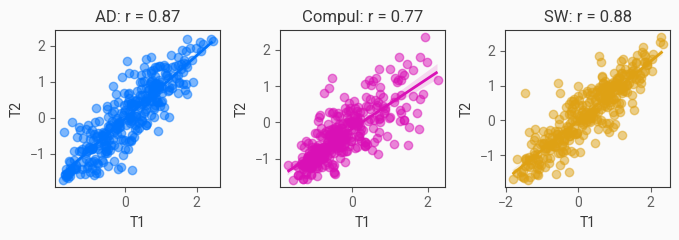

In [4]:
plot_timepoint_correlations(qdata, ["AD", "Compul", "SW"]);

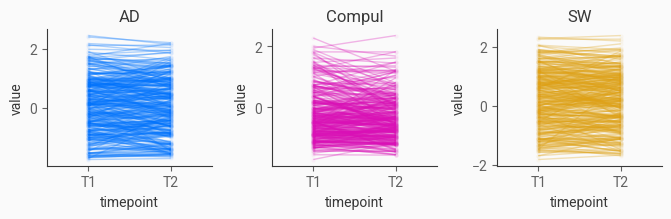

In [5]:
plot_timepoint_stripplots(qdata_long, ["AD", "Compul", "SW"]);

## Task measures

### Test-retest reliability using ICC

We calculate the intraclass correlation coefficient (ICC) for each task measure to assess the test-retest reliability of the task measures. We use a custom `calculate_intraclass_correlations` function, which uses the `intraclass_corr` function from [`pingouin`](https://pingouin-stats.org) to calculate the ICC. We use ICC3 here.

In [6]:
task_icc = calculate_intraclass_correlations(
    qdata_long,
    [
        "tau_prob",
        "transition_var",
        "decay_prob",
        "temperature",
        "MB_MF_WAIC_diff",
    ],
)

task_icc

,Type,Description,ICC,F,df1,df2,pval,CI95%,variable
2,ICC3,Single fixed raters,0.618256,4.239116,325,325,3.626381e-36,"[0.55, 0.68]",tau_prob
2,ICC3,Single fixed raters,0.595440,3.943639,325,325,4.680101e-33,"[0.52, 0.66]",transition_var
2,ICC3,Single fixed raters,0.270544,1.741771,325,325,3.408897e-07,"[0.17, 0.37]",decay_prob
2,ICC3,Single fixed raters,0.461242,2.712245,325,325,6.233297e-19,"[0.37, 0.54]",temperature
2,ICC3,Single fixed raters,0.597869,3.973500,325,325,2.243265e-33,"[0.52, 0.66]",MB_MF_WAIC_diff


### Plot changes over time

We can plot the `T1` scores against the `T2` scores to see how similar they are. In addition, we calculate the Pearson correlation coefficient between the two timepoints to quantify how similar they are.

array([<Axes: title={'center': 'MB_MF_WAIC_diff: r = 0.62'}, xlabel='T1', ylabel='T2'>,
       <Axes: title={'center': 'transition_var: r = 0.60'}, xlabel='T1', ylabel='T2'>,
       <Axes: title={'center': 'tau_prob: r = 0.63'}, xlabel='T1', ylabel='T2'>],
      dtype=object)

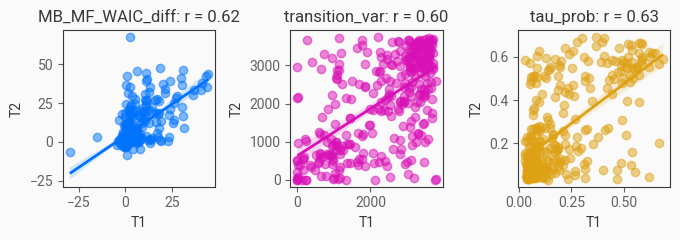

In [7]:
plot_timepoint_correlations(
    qdata, ["MB_MF_WAIC_diff", "transition_var", "tau_prob"]
)

We can also plot the change over time for each task measure, using a single line per subject to show how their parameter estimates change over time.

array([<Axes: title={'center': 'MB_MF_WAIC_diff'}, xlabel='timepoint', ylabel='value'>,
       <Axes: title={'center': 'transition_var'}, xlabel='timepoint', ylabel='value'>,
       <Axes: title={'center': 'tau_prob'}, xlabel='timepoint', ylabel='value'>],
      dtype=object)

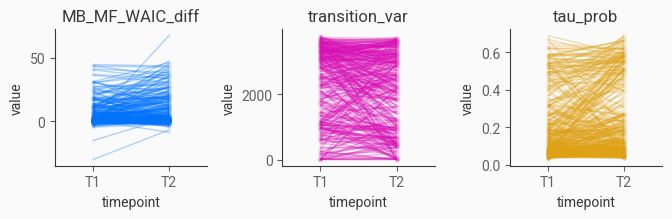

In [8]:
plot_timepoint_stripplots(
    qdata_long, ["MB_MF_WAIC_diff", "transition_var", "tau_prob"]
)

## State anxiety and depression

### Test-retest reliability using ICC

In [9]:
anx_dep_icc = calculate_intraclass_correlations(qdata_long, ["GAD_7", "PHQ_8"])

### Plot changes over time

array([<Axes: title={'center': 'GAD_7: r = 0.75'}, xlabel='T1', ylabel='T2'>,
       <Axes: title={'center': 'PHQ_8: r = 0.77'}, xlabel='T1', ylabel='T2'>],
      dtype=object)

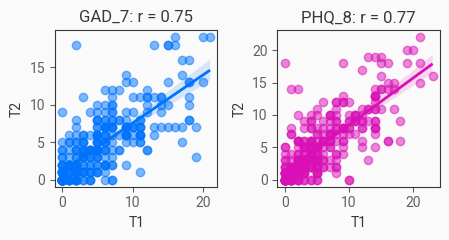

In [10]:
plot_timepoint_correlations(qdata, ["GAD_7", "PHQ_8"], fig_kwargs={})

array([<Axes: title={'center': 'GAD_7'}, xlabel='timepoint', ylabel='value'>,
       <Axes: title={'center': 'PHQ_8'}, xlabel='timepoint', ylabel='value'>],
      dtype=object)

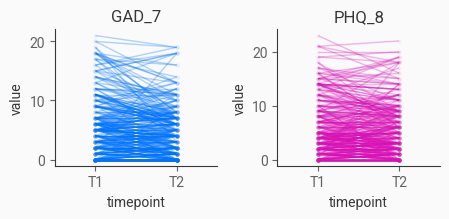

In [11]:
plot_timepoint_stripplots(qdata_long, ["GAD_7", "PHQ_8"], fig_kwargs={})

## Other measures

### Look at how score changes (i.e., practice effects)

Text(-35.62777777777778, 0.5, 'Score')

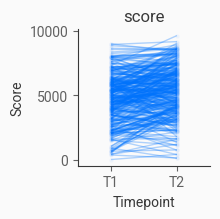

In [12]:
# Get mean/SD of score for each timepoint
qdata_long[qdata_long["variable"] == "score"].groupby(["timepoint"])[
    "value"
].describe().reset_index()

# Plot as a stripplot
ax = plot_timepoint_stripplots(
    qdata_long,
    ["score"],
    fig_kwargs={},
)

# Update the axis labels
ax[0].set_xlabel("Timepoint")
ax[0].set_ylabel("Score")

### Test-retest reliability of behavioural metrics

Here we look at how stable simple behavioural metrics are over time. These include:
* `score`: the number of points earned on the task
* `bet_correct`: accuracy on confidence trials (i.e., predicting the ball colour)
* `exploded`: The number of balls that exploded

In [13]:
calculate_intraclass_correlations(
    qdata_long,
    [
        "score",
        "bet_correct",
        "exploded",
    ],
)

,Type,Description,ICC,F,df1,df2,pval,CI95%,variable
2,ICC3,Single fixed raters,0.685756,5.364477,325,325,4.645617e-47,"[0.62, 0.74]",score
2,ICC3,Single fixed raters,0.202163,1.506779,325,325,1.167002e-04,"[0.1, 0.3]",bet_correct
2,ICC3,Single fixed raters,0.167482,1.402351,325,325,1.188800e-03,"[0.06, 0.27]",exploded


### Save Markdown tables

Finally, we output tables to Markdown for use in the manuscript.

In [14]:
# Create markdown tables
task_icc_table = icc_to_markdown_table(
    task_icc,
    variable_rename_dict={
        "tau_prob": "Transition update rate",
        "decay_prob": "Decay rate",
        "temperature": "Softmax temperature",
        "transition_var": "Transition variance",
        "MB_MF_WAIC_diff": "MB-MF fit difference",
        "two_step_parameter": "Two-step parameter",
    },
)

transdiagnostic_icc_table = icc_to_markdown_table(
    transdiagnostic_icc,
    variable_rename_dict={
        "AD": "AD",
        "Compul": "CIT",
        "SW": "SW",
    },
)

anx_dep_icc_table = icc_to_markdown_table(
    anx_dep_icc,
    variable_rename_dict={
        "GAD_7": "GAD-7",
        "PHQ_8": "PHQ-8",
    },
)

# Get common legend
legend = "$ICC$ = intraclass correlation coefficient, $F$ = F-statistic, "
"$df1$ = numerator degrees of freedom, $df2$ = denominator degrees of freedom."
"$p$ = p-value, $CI_{2.5}$ = 2.5% confidence interval, "
"$CI_{97.5}$ = 97.5% confidence interval."

# Create the caption with proper formatting
captions = [
    "Intraclass correlation coefficients for task variables over a one year period. "
    + legend,
    "Intraclass correlation coefficients for transdiagnostic dimensions variables over "
    "a one year period. AD = Anxiety and depression, CIT = Compulsivity and "
    "intrusive thought, SW = Social withdrawal. " + legend,
    "Intraclass correlation coefficients for anxiety and depression variables over a "
    "one year period. GAD-7 = Generalised Anxiety Disorder 7-item scale, PHQ-8 = "
    "Patient Health Questionnaire 8-item scale. " + legend,   
]

# Save the markdown tables with the caption
save_markdown_tables(
    [task_icc_table, transdiagnostic_icc_table, anx_dep_icc_table],
    captions, 
    "paper/supplementary_tables.md", 
    append=True
)

Appending to existing file: paper/supplementary_tables.md
Conversion to PDF completed successfully.
Conversion to docx completed successfully.
